These are some early bandit tests. One thing that's apparent is that I need to vary the rewards in the environment, or else I think I am getting biased results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from bandit.bandit import (
    EpsGreedyBandit, 
    GreedyBandit, 
    RandomBandit,
)
from bandit.environment import Environment
from bandit.reward import GaussianReward

In [3]:
# Make the rewards and environment
rewards = [GaussianReward(mean = np.random.randn()) for _ in range(10)]
env = Environment(rewards)

In [4]:
# Make all the bandits
Nbandits = 2000
rbandits = [RandomBandit(env) for _ in range(Nbandits)]
gbandits = [GreedyBandit(env) for _ in range(Nbandits)]
ebandits = [EpsGreedyBandit(env, eps=0.1) for _ in range(Nbandits)]

In [5]:
# Figure out the best reward
best_choice = np.argmax(env.expected_rewards())
print(f"best choice is {best_choice}")

best choice is 5


In [6]:
# Have all bandits take 1000 steps
Nsteps = 1000
for i in range(Nbandits):
    for s in range(Nsteps):
        rbandits[i].action()
print("Done with RandomBandits")

Done with RandomBandits


In [7]:
for i in range(Nbandits):
    for s in range(Nsteps):
        gbandits[i].action()
print("Done with GreedyBandits")

Done with GreedyBandits


In [8]:
for i in range(Nbandits):
    for s in range(Nsteps):
        ebandits[i].action()
print("Done with EpsGreedyBandits")

Done with EpsGreedyBandits


In [9]:
from bandit.figures import (
    plot_average_rewards,
    plot_reward_distributions,
)

In [10]:
# Pull out the histories
rrewards = [b.reward_history for b in rbandits]
grewards = [b.reward_history for b in gbandits]
erewards = [b.reward_history for b in ebandits]

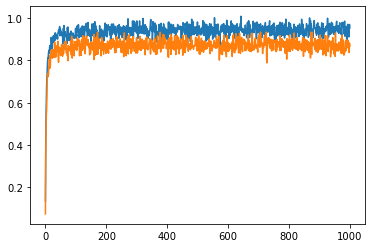

In [11]:
fig, ax = plot_average_rewards(grewards)
#fig, ax = plot_average_rewards(grewards, ax)
fig, ax = plot_average_rewards(erewards, ax)

In [13]:
rchoices = np.array([b.choice_history for b in rbandits])
gchoices = np.array([b.choice_history for b in gbandits])
echoices = np.array([b.choice_history for b in ebandits])

(0.0, 1.0)

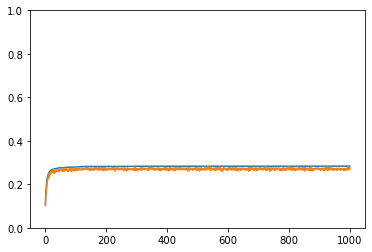

In [17]:
plt.plot(np.mean(gchoices == best_choice, axis=0))
plt.plot(np.mean(echoices == best_choice, axis=0))
plt.ylim(0, 1)

In [37]:
print(ebandits[10].values)
b = ebandits[44]
c = np.array(b.choice_history)
print(np.unique(c, return_counts = True))

[-0.05148327294134516, 0.005591740467524721, 1.0873432390528173, 0.0033858533299993836, 0.03672885295089938, 0.07869930689686172, -0.03312572813012007, -0.0009496890333269821, -0.5914093617650551, 0.22987776728287698]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([  4,  12,  12,   9,   6, 924,   7,   9,   8,   9]))


In [35]:
print(env.expected_rewards())

[-1.71023957 -0.17415374  1.08852288 -0.09457224  0.45743981  1.42447522
 -0.97040353 -0.05425843  0.52516856  0.72280457]
